In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 데이터 불러오기 

In [2]:
sample = pd.read_csv('sample_submission.csv')
sample.head()

,id,booking_status
0,42100,0.392
1,42101,0.392
2,42102,0.392
3,42103,0.392
4,42104,0.392


In [3]:
test = pd.read_csv('test.csv')
test.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [4]:
train = pd.read_csv('train.csv')
train.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


# 데이터 확인하기

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28068 entries, 0 to 28067
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    28068 non-null  int64  
 1   no_of_adults                          28068 non-null  int64  
 2   no_of_children                        28068 non-null  int64  
 3   no_of_weekend_nights                  28068 non-null  int64  
 4   no_of_week_nights                     28068 non-null  int64  
 5   type_of_meal_plan                     28068 non-null  int64  
 6   required_car_parking_space            28068 non-null  int64  
 7   room_type_reserved                    28068 non-null  int64  
 8   lead_time                             28068 non-null  int64  
 9   arrival_year                          28068 non-null  int64  
 10  arrival_month                         28068 non-null  int64  
 11  arrival_date   

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

## 기술통계

In [7]:
test.describe().round(2)

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,28068.00,28068.00,28068.00,28068.00,28068.00,28068.00,28068.00,28068.00,28068.00,28068.00,28068.00,28068.00,28068.00,28068.00,28068.00,28068.00,28068.00,28068.00
mean,56133.50,1.92,0.14,0.89,2.39,0.23,0.03,0.43,103.85,2017.86,7.58,15.87,0.73,0.03,0.02,0.20,104.64,0.57
std,8102.68,0.53,0.45,0.88,1.40,0.58,0.16,0.83,81.13,0.35,2.83,8.93,0.63,0.17,0.41,1.94,36.82,0.77
min,42100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2017.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,49116.75,2.00,0.00,0.00,1.00,0.00,0.00,0.00,37.00,2018.00,5.00,8.00,0.00,0.00,0.00,0.00,80.00,0.00
50%,56133.50,2.00,0.00,1.00,2.00,0.00,0.00,0.00,92.00,2018.00,8.00,16.00,1.00,0.00,0.00,0.00,99.45,0.00
75%,63150.25,2.00,0.00,2.00,3.00,0.00,0.00,1.00,154.00,2018.00,10.00,24.00,1.00,0.00,0.00,0.00,123.30,1.00
max,70167.00,4.00,9.00,6.00,17.00,3.00,1.00,6.00,443.00,2018.00,12.00,31.00,4.00,1.00,13.00,58.00,540.00,5.00


In [8]:
train.describe().round(2)

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,42100.00,42100.00,42100.00,42100.00,42100.00,42100.00,42100.00,42100.00,42100.00,42100.00,42100.00,42100.00,42100.00,42100.00,42100.00,42100.00,42100.00,42100.00,42100.00
mean,21049.50,1.92,0.14,0.88,2.40,0.24,0.03,0.43,103.89,2017.86,7.59,15.90,0.73,0.03,0.02,0.18,104.57,0.57,0.39
std,12153.37,0.52,0.45,0.89,1.43,0.59,0.16,0.83,81.07,0.35,2.83,8.89,0.63,0.17,0.33,1.73,37.14,0.78,0.49
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2017.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,10524.75,2.00,0.00,0.00,1.00,0.00,0.00,0.00,37.00,2018.00,6.00,8.00,0.00,0.00,0.00,0.00,80.00,0.00,0.00
50%,21049.50,2.00,0.00,1.00,2.00,0.00,0.00,0.00,93.00,2018.00,8.00,16.00,1.00,0.00,0.00,0.00,99.45,0.00,0.00
75%,31574.25,2.00,0.00,2.00,3.00,0.00,0.00,1.00,155.00,2018.00,10.00,24.00,1.00,0.00,0.00,0.00,123.30,1.00,1.00
max,42099.00,4.00,9.00,7.00,17.00,3.00,1.00,6.00,443.00,2018.00,12.00,31.00,4.00,1.00,13.00,58.00,540.00,5.00,1.00


# test 시각화

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

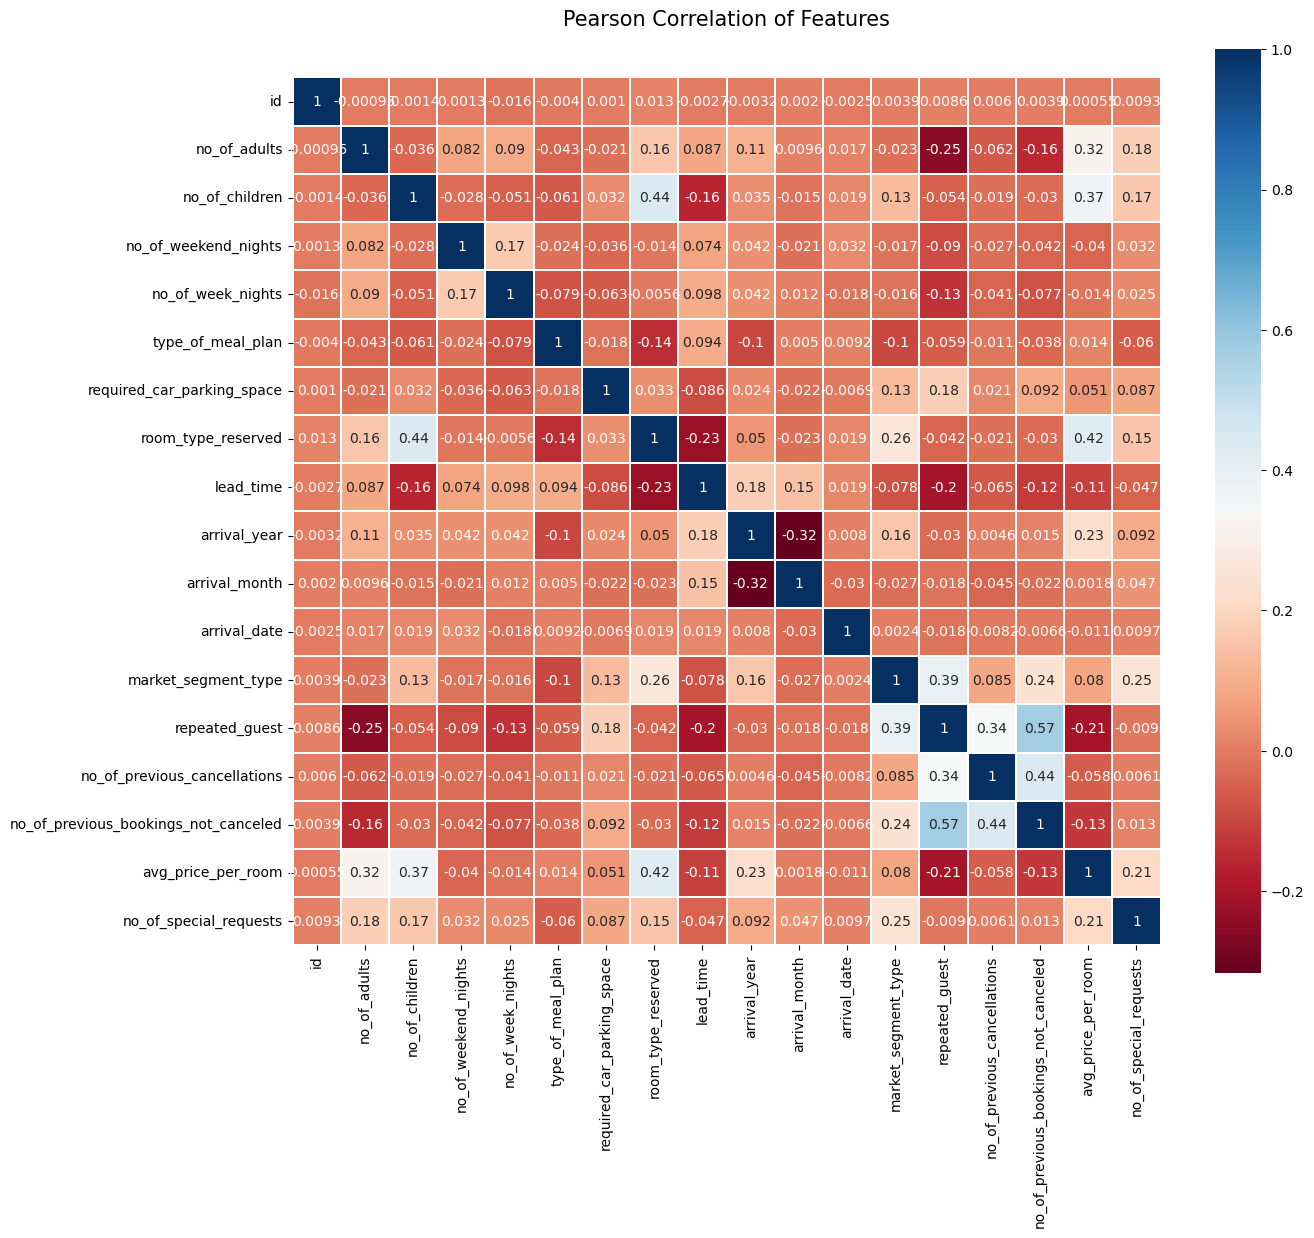

In [9]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(test.corr(),linewidths=0.1, vmax=1.0,square=True, cmap=colormap, linecolor='white', annot=True)

Text(0.5, 1.0, 'no_of_adults')

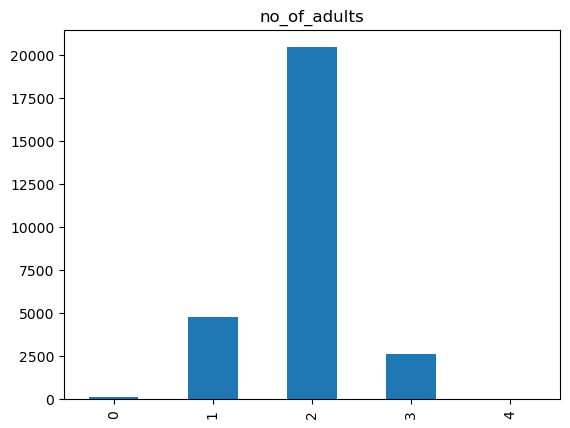

In [24]:
test['no_of_adults'].value_counts().sort_index().plot(kind = 'bar')
plt.title('no_of_adults')

Text(0.5, 1.0, 'no_of_children')

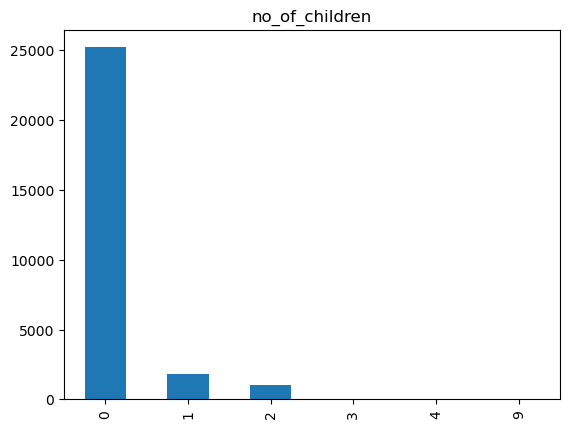

In [25]:
test.iloc[:, 2].value_counts().sort_index().plot(kind = 'bar')
plt.title('no_of_children')

Text(0.5, 1.0, 'no_of_weekend_nights')

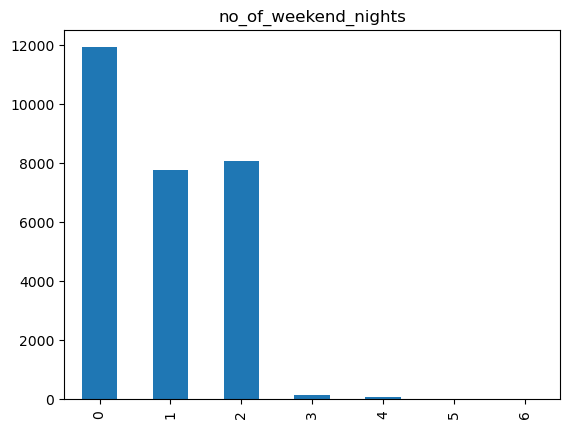

In [26]:
test.iloc[:, 3].value_counts().sort_index().plot(kind = 'bar')
plt.title('no_of_weekend_nights')

Text(0.5, 1.0, 'no_of_week_nights')

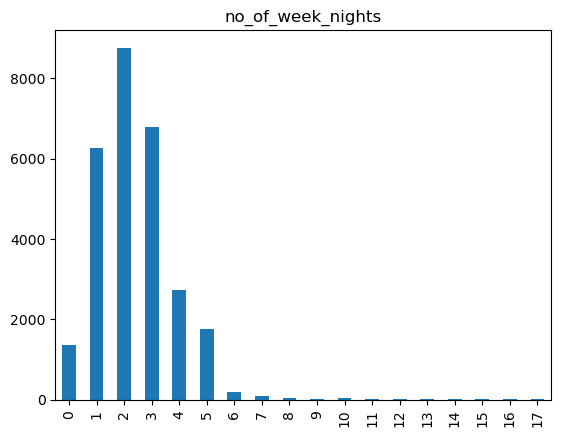

In [27]:
test.iloc[:, 4].value_counts().sort_index().plot(kind = 'bar')
plt.title('no_of_week_nights')  

Text(0.5, 1.0, 'no_of_special_request')

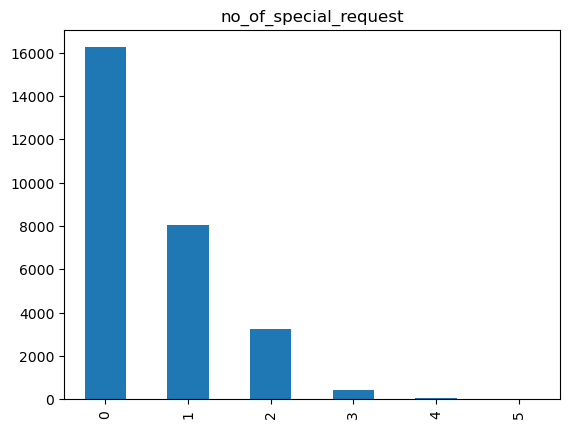

In [38]:
test.iloc[:, -1].value_counts().sort_index().plot(kind = 'bar')
plt.title('no_of_special_request')  

<AxesSubplot:>

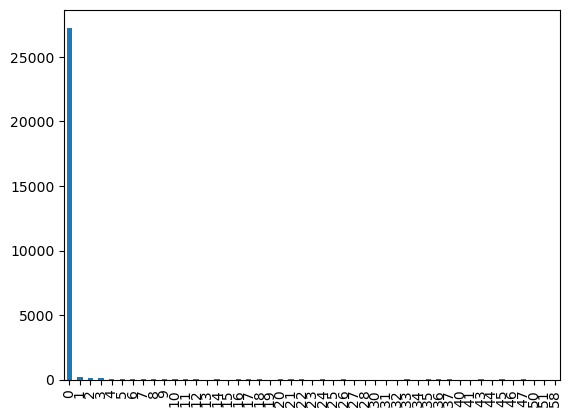

In [39]:
test.iloc[:, -3].value_counts().sort_index().plot(kind = 'bar')
# plt.title('no_of_week_nights')  

In [37]:
test.no_of_previous_bookings_not_canceled.value_counts().sort_values(ascending=True)
# repeated_guest

30        1
46        1
28        1
19        1
40        1
50        1
58        1
51        1
44        2
15        2
34        2
13        2
25        2
41        2
32        2
23        2
31        2
27        2
37        3
45        3
18        3
47        3
33        3
36        4
24        4
26        4
35        4
43        4
22        5
21        6
17        6
16        7
14        8
9        11
20       12
12       12
10       14
11       21
8        34
7        39
6        42
5        59
4        68
3        80
2       115
1       184
0     27282
Name: no_of_previous_bookings_not_canceled, dtype: int64